<a href="https://colab.research.google.com/github/yogee2406/Breast-cancer-ML_Yogeeta.ipynb/blob/main/ML_foundation_LIA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Levin Insurance Agency**

## Company Introduction

Our client for this project is a Financial services company.

LIA is a leading General Insurance Company.

LIA has introduced over 200 types of insurance including for life, health, and accidents

The company currently operates in 15 countries, including 10 in Asia. Its customer base has grown from two million in 2008 to more than 40 million today, and date, it has paid more than $20 million in claims.

LIA wishes to cross-sell health insurance to existing customers who may or may not hold insurance policies with the company.

The company recommends health insurance to its customers based on their profile once these customers land on the website.

# Current Scenario

Customers might browse the recommended health insurance policy and consequently fill up a form to apply.

When these customers fill up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

The company wants to build an ML model to predict whether the person will be interested in their proposed Health policy with the help of given user information.

Currently, the company recommends health policies to their customers manually based on their previous policies and profile.

**Problem Statement**

The current process suffers from the following problems:

The current process is a manual prediction of whether customers will be interested in recommended policy. This is very tedious and time-consuming as it needs to be repeated every time a new customer we contact.

The company has hired you as a data science consultant.

They want to automate the process of predicting whether the customer is interested in recommended policy or not using the information provided by the customer.

# Our Role

You are given a dataset consisting of information of customers like their city, age, region, marital status, holding policy type and duration.
Your task is to build a classification model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

# Project Deliverables

Deliverable: Health Insurance Lead Prediction.
Machine Learning Task: Classification
Target Variable: Response
Win Condition: N/A (best possible model)

# Evaluation Metric
The model evaluation will be based on the F1 Score score.

**Data Description:**

This database was created to identify whether a customer will be interested in recommended policy based on user provided data.

The column response is also present in the dataset which has two values 1 and 0.

This is the data that we have to predict for future samples.


The dataset is divided into two parts: Train, and Test sets.

Train Set:
The train set contains 38000 rows and 14 columns.
The last column response is the target variable.

Test Set:
The test set contains 12882 rows and 13 columns.
The test set doesn’t contain the Response column.
It needs to be predicted for the test set.

**Health Insurance Lead** **Prediction**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',50)

In [ ]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
traindf = pd.read_csv('/content/drive/MyDrive/LIA/train_data.csv')
testdf = pd.read_csv('/content/drive/MyDrive/LIA/test_data.csv')

In [ ]:
print(traindf.shape)
traindf.head(5)

(38000, 14)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


**Data Cleaning | Scrub**

**Null Values**

In [ ]:
traindf.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator            8720
Holding_Policy_Duration    15081
Holding_Policy_Type        15081
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
nonclients = ['Holding_Policy_Duration','Holding_Policy_Type']
for col in nonclients:
    traindf[col] = traindf[col].fillna(0)
    testdf[col] = testdf[col].fillna(0)

In [ ]:
traindf['Health Indicator'] = traindf['Health Indicator'].fillna(traindf['Health Indicator'].mode()[0])
testdf['Health Indicator'] = testdf['Health Indicator'].fillna(testdf['Health Indicator'].mode()[0])

With many of these prospects not clearly identified as current clients, its safe to assume that null values in the 'Policy Duration' and 'Policy Type' columns are tied to non existing accounts and may be filled with zeros.

**Feature Engineering**

Convert to numerical: Holding_Policy_Duration

Feature engineer long term customers

Convert '14+' to '15' / convert to numerical

Note: (after **EDA)** Convert to binary | Accomodation_Type, Reco_Insurance_Type, Is_Spouse

**Categorical Features**

In [ ]:
traindf['Long_Term_Cust'] = traindf['Holding_Policy_Duration'].apply(lambda x: 'Yes' if x == '14+' else 'No')
testdf['Long_Term_Cust'] = testdf['Holding_Policy_Duration'].apply(lambda x: 'Yes' if x == '14+' else 'No')

traindf['Holding_Policy_Duration'] = traindf['Holding_Policy_Duration'].replace('14+',15).astype(float).astype(int)
testdf['Holding_Policy_Duration'] = testdf['Holding_Policy_Duration'].replace('14+',15).astype(float).astype(int)

**Renaming Features**

In [ ]:
traindf.rename(columns={'Is_Spouse':'Married','Health Indicator':'Health_Indicator'},inplace=True)
testdf.rename(columns={'Is_Spouse':'Married','Health Indicator':'Health_Indicator'},inplace=True)

traindf['Avg_Age'] = (traindf['Upper_Age'] + traindf['Lower_Age']) / 2
testdf['Avg_Age'] = (testdf['Upper_Age'] + testdf['Lower_Age']) / 2

Typically, insurance products are priced and underwritten based on the age of the applicant or applicants. This is especially the case in most health insurance pricing. To reflect this and retain data, an average age feature will be created and the original two features will be dropped.

In [ ]:
# feature engineering
traindf['Prim_Prem_Ratio'] = traindf['Reco_Policy_Premium'] / traindf['Upper_Age']
testdf['Prim_Prem_Ratio'] = testdf['Reco_Policy_Premium'] / testdf['Upper_Age']

**Feature Selection**

In [ ]:
traindf.drop(['ID','Region_Code','Upper_Age','Lower_Age'],axis=1,inplace=True)
testdf2 = testdf.copy()
testdf.drop(['ID','Region_Code','Upper_Age','Lower_Age'],axis=1,inplace=True)

The unique 'ID' and 'Region Code' columns will be dropped in order to simplify the data. 'Region Code' consists of far too many categorical values which would need to be one hot encoded. The feature is dropped as the data still retains the 'City Code' feature to capture some level of geographical distinction. In addition, the upper and lower age features will be dropped being represented by average age

In [ ]:
numcols = testdf.select_dtypes('number').columns
for col in numcols:
    traindf[col] = traindf[col].astype(int)
    testdf[col] = testdf[col].astype(int)

In [ ]:
# copy for final analysis
df = traindf.copy()

In [ ]:
vals = {'Rented':1,'Owned':2,'Individual':1,'Joint':2,'No':0,'Yes':1}
cols = ['Accomodation_Type','Reco_Insurance_Type','Married','Long_Term_Cust']

for col in cols:
    traindf[col] = traindf[col].replace(vals)
    testdf[col] = testdf[col].replace(vals)

Features 'Accommodation Type', 'Reco Insurance Type', 'Is Spouse' will be converted to binary (0 and 1).

In [ ]:
ordinal = ['Holding_Policy_Type','Reco_Policy_Cat']
for col in ordinal:
    traindf[col] = traindf[col].astype('O')
    testdf[col] = testdf[col].astype('O')

**Exploratory Data Analysis**

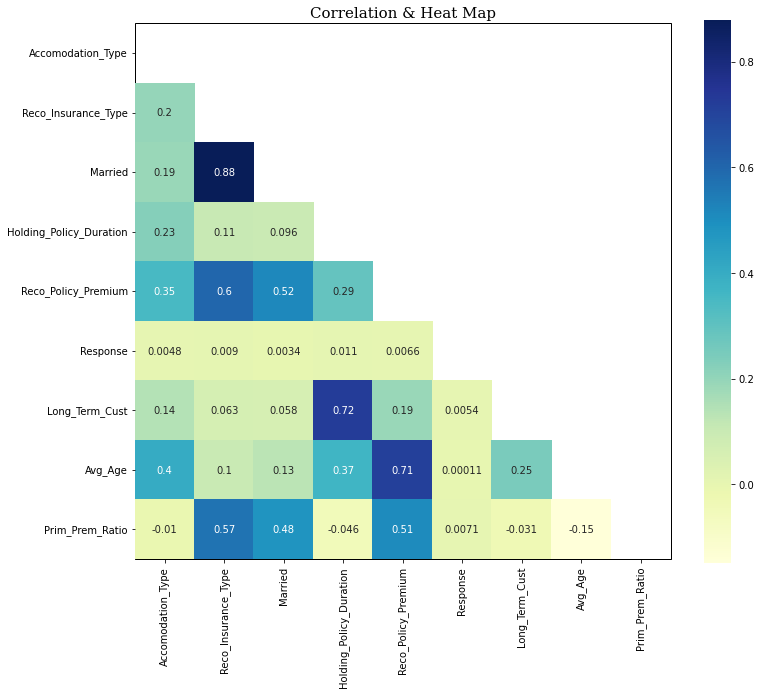

In [ ]:
corr = traindf.corr() # analyzing correlation
fig, ax = plt.subplots(figsize=(12,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='YlGnBu')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
ax.set_title('Correlation & Heat Map', fontsize=15, fontfamily='serif')
plt.show()

In [ ]:
traindf.drop(['Married'],axis=1,inplace=True)
testdf.drop(['Married'],axis=1,inplace=True)

**Final feature selection due to multicollinearity.**

In [ ]:
targetdf = df.groupby('Response').mean().head()
targetdf.style.background_gradient(cmap='Reds')

,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Avg_Age,Prim_Prem_Ratio
Response,,,,,,
0,3.677520,1.463190,14.692935,14157.223351,43.733720,317.821374
1,3.802713,1.479378,16.450265,14260.117446,43.737980,319.352228


Customers who elect to receive additional information typically hold existing policies longer and are classified under a larger policy category with a slightly larger premium.

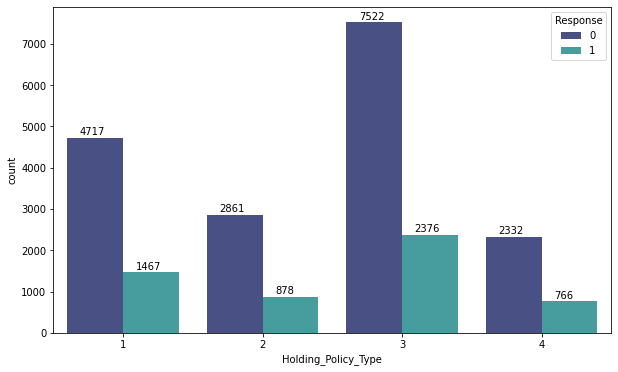

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data=df[df['Holding_Policy_Type']!=0],x='Holding_Policy_Type',hue='Response',palette='mako');
for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x()+0.09, p.get_height()+75))
fig.savefig('policytypecount.jpg',dpi=200,bbox_inches='tight')

Holding Policy Type three has the highest number of positive responses, but all four of the categories have approximately 30% positive to negative client responses.

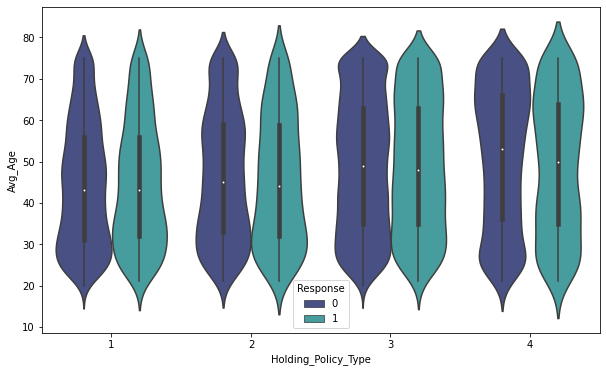

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=df[df['Holding_Policy_Type']!=0],x='Holding_Policy_Type',y='Avg_Age',hue='Response',palette='mako');
fig.savefig('policytypexage.jpg',dpi=200,bbox_inches='tight')

The violin plot gives an interesting take on Average Age versus Holding Policy Type. HPT 3 shows a pretty even distribution across age groups while HPT 1 is heavily made up of younger individuals.

In [ ]:
traincat_vars = [var for var in traindf.columns if traindf[var].dtype == 'O']
testcat_vars = [var for var in testdf.columns if testdf[var].dtype == 'O']

**Final Transformations**

In [ ]:
def replace_categories(df, var, target):
    # Order variable categories | lowest to highest against target (price)
    ordered_labels = df.groupby([var])[target].mean().sort_values().index
    # Dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    # Replace the categorical strings by integers using dictionary
    df[var] = df[var].map(ordinal_label)

In [ ]:
for var in traincat_vars:
    replace_categories(traindf, var, 'Avg_Age')

In [ ]:
for var in testcat_vars:
    replace_categories(testdf, var, 'Avg_Age')

With each of the categorical values mapped to values with respect to average age, the resulting values will end up on a similar scale as the rest of the dataset. In order to minimize data manipulation for modeling, no label encoding or standard scaling will occur.

In [ ]:
# labelencoder = preprocessing.LabelEncoder()
# scaler = preprocessing.StandardScaler()

In [ ]:
# traindf['City_Code'] = labelencoder.fit_transform(traindf['City_Code'])
# testdf['City_Code'] = labelencoder.fit_transform(testdf['City_Code'])
# traindfscaled = scaler.fit_transform(traindf)
# testdfscaled = scaler.fit_transform(testdf)

**Model Pycaret** 

In [ ]:
dataset = traindf.copy()
data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (30400, 12)
Unseen Data For Predictions: (7600, 12)


**Scikit-learn**

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def model_visuals (model, X_test, y_test):
    '''Plots the confusion matrix and ROC-AUC plot'''
    fig, axes = plt.subplots(figsize = (12, 6), ncols = 2)  # confusion matrix
    metrics.plot_confusion_matrix(model, X_test, y_test, normalize = 'true', 
                          cmap = 'Blues', ax = axes[0])
    axes[0].set_title('Confusion Matrix');
    # ROC-AUC Curve
    roc_auc = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].set_title('ROC-AUC Plot')
    axes[1].grid()
    axes[1].legend()
    fig.tight_layout()
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindf.drop(columns=['Response'],axis=1),traindf['Response'],test_size=0.2, random_state=42)

**GridSearchCV**

In [ ]:
gbclf = GradientBoostingClassifier(random_state=42)
gbclf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
param_grid = {
    'learning_rate': [0.1,0.2],
    'max_depth': [6],
    'subsample': [0.5,0.7,1],
    'n_estimators': [100]
}

**Final Model**

In [ ]:
gbclf = GradientBoostingClassifier(max_depth=6,learning_rate=0.1,n_estimators=100,subsample=1,random_state=42)
gbclf.fit(X_train,y_train)
# predict
training_preds = gbclf.predict(X_train)
test_preds = gbclf.predict(X_test)
# accuracy
training_accuracy = accuracy_score(y_train,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      5837
           1       0.45      0.04      0.07      1763

    accuracy                           0.77      7600
   macro avg       0.61      0.51      0.47      7600
weighted avg       0.70      0.77      0.68      7600
 




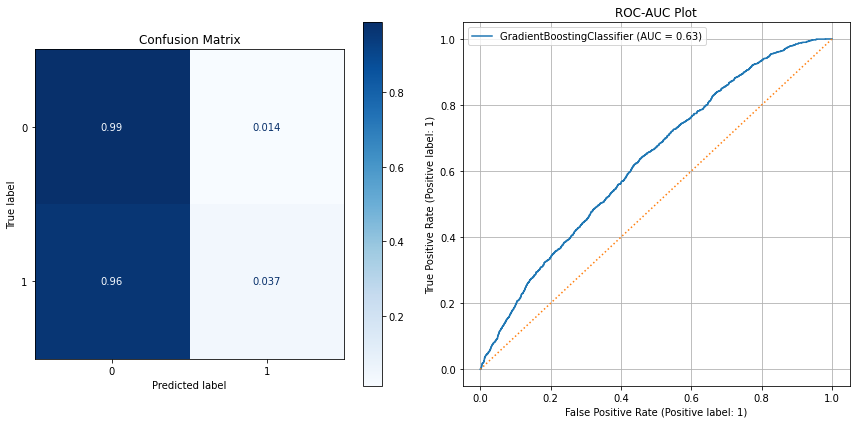

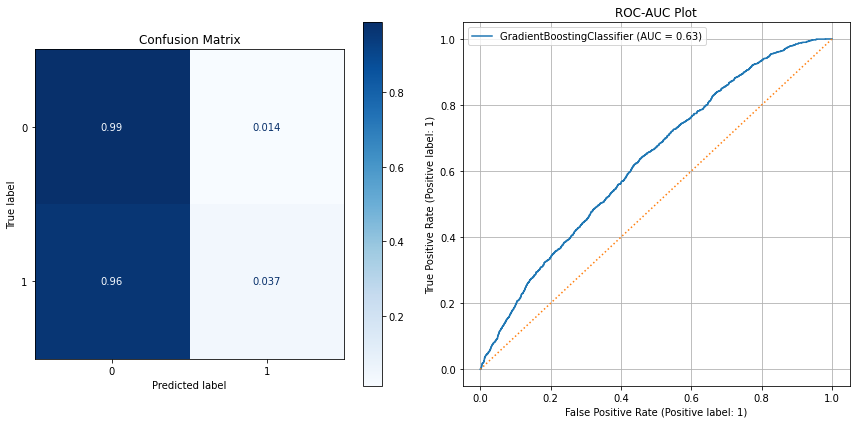

In [ ]:
print(classification_report(y_test, test_preds), '\n\n')
model_visuals (gbclf, X_test, y_test) # class report / plotsprint(classification_report(y_test, test_preds), '\n\n')
model_visuals (gbclf, X_test, y_test) # class report / plots

**Interpret Results**

**Feature Importance**

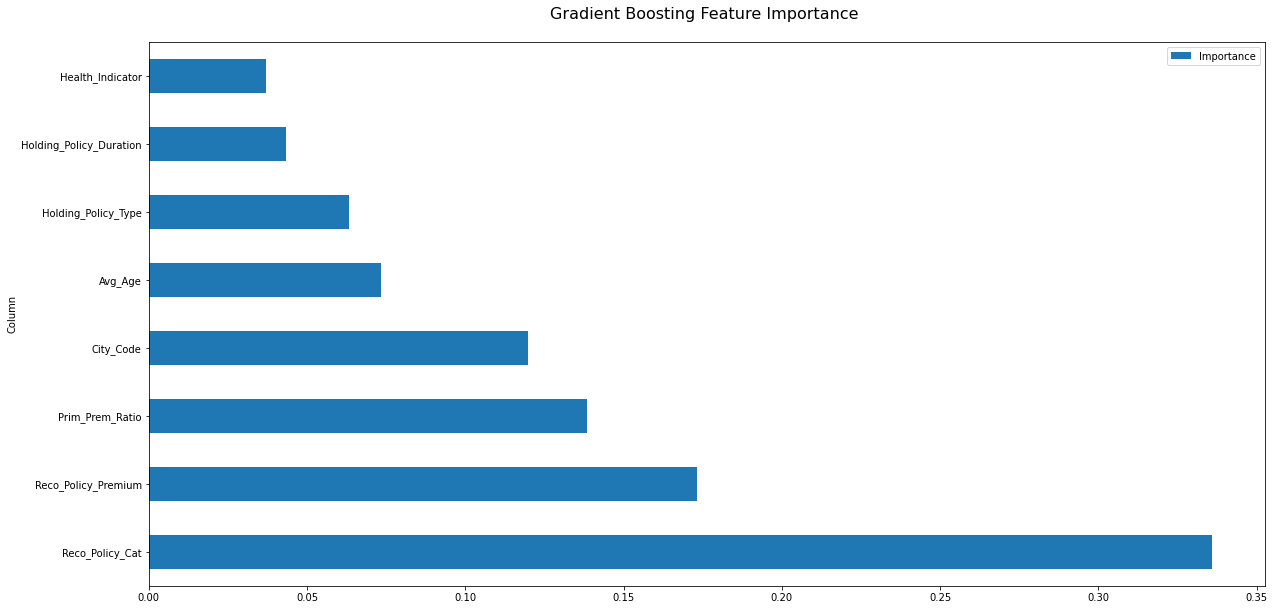

In [ ]:
# Feature Importance
X = traindf.drop(columns=['Response'],axis=1)
clf_feature = pd.DataFrame({'Importance':gbclf.feature_importances_,'Column':X.columns})
clf_feature = clf_feature.sort_values(by='Importance',ascending=False) 
clf_feature = clf_feature[:8] # top 8 features
clf_feature.plot(kind='barh',x='Column',y='Importance',figsize=(20, 10))
plt.title('Gradient Boosting Feature Importance \n',fontsize=16)
plt.savefig('featureimportance.jpg',dpi=200,bbox_inches='tight')
plt.show()

**Reco Policy Category**

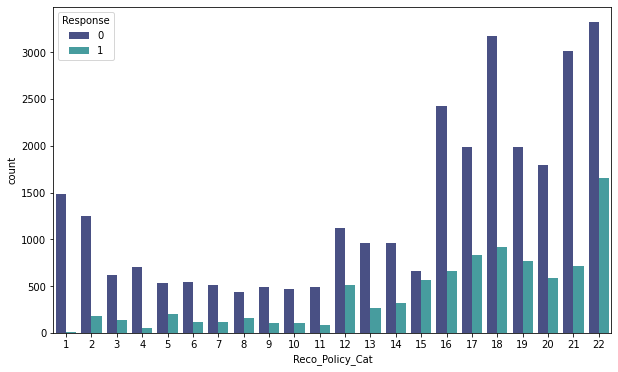

In [ ]:
df['Reco_Policy_Cat'] = df['Reco_Policy_Cat'].astype('O')

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df,x='Reco_Policy_Cat',hue='Response',palette='mako');
fig.savefig('policycategoryxresponse.jpg',dpi=200,bbox_inches='tight')

This graph may be misleading as each policy category caries a significantly different client count. Lets break down the top five categories based on positive over total responses.

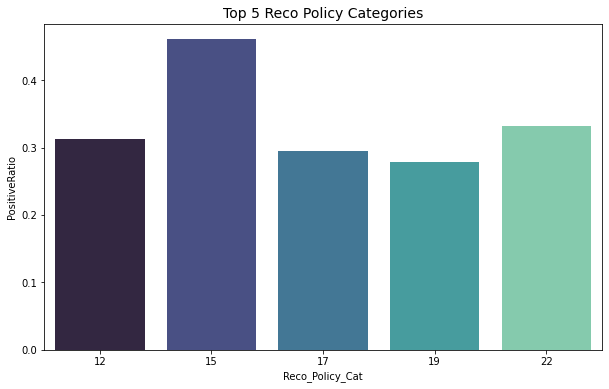

In [ ]:
RPC = df.groupby(['Reco_Policy_Cat','Response'])['Response'].count().unstack()
RPC['PositiveRatio'] = RPC[1] / (RPC[1] + RPC[0])
RPC = RPC.sort_values(by='PositiveRatio', ascending=False)[:5].reset_index()
# RPC
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Top 5 Reco Policy Categories', fontdict={'fontsize': 14})
sns.barplot(data=RPC,x='Reco_Policy_Cat',y='PositiveRatio',palette='mako');
fig.savefig('top5categoryxresponse.jpg',dpi=200,bbox_inches='tight')

Reco Policy Category 15 is the clear front runner

**Reco Policy Premium**

In [ ]:
# Binning Ages for Visualizations
df['Premium(bin)'] = df['Reco_Policy_Premium'].apply(lambda x: '0-9999' if x < 10000
                                                     else '10000-14999' if x < 15000 
                                                     else '15000-19999' if x < 20000 
                                                     else '20000-24999' if x < 25000 
                                                     else '25000-29999' if x < 30000 
                                                     else '30000+')

In [ ]:
# dashboard analysis
df.to_csv('jobathondashboard.csv')

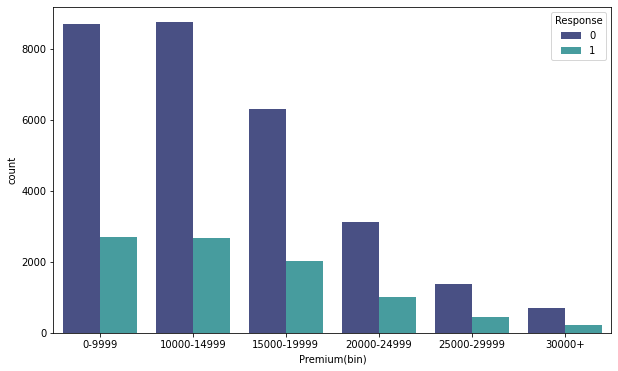

In [ ]:
df = df.sort_values(['Premium(bin)'], ascending=True)
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df,x='Premium(bin)',hue='Response',palette='mako');
fig.savefig('premiumbin.jpg',dpi=200,bbox_inches='tight')

Lets confirm the positive to total response ratios before we make a recommendation.

In [ ]:
PRE = df.groupby(['Premium(bin)','Response'])['Response'].count().unstack()
PRE['PositiveRatio'] = PRE[1] / (PRE[1] + PRE[0])
PRE = PRE.sort_values(by='PositiveRatio', ascending=False)
PRE

Response,0,1,PositiveRatio
Premium(bin),,,
25000-29999,1372,451,0.247394
15000-19999,6291,2018,0.242869
20000-24999,3110,997,0.242756
0-9999,8699,2712,0.237665
10000-14999,8751,2678,0.234316
30000+,709,212,0.230185


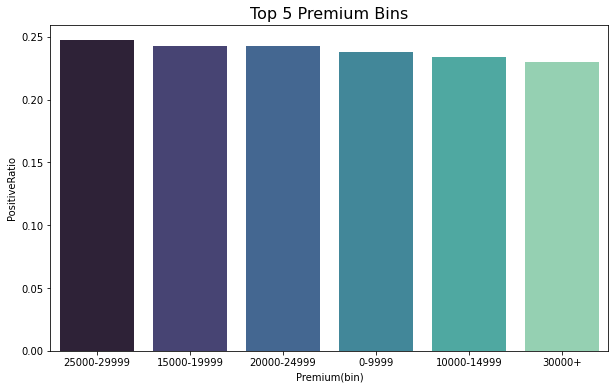

In [ ]:
PRE = PRE.reset_index()
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Top 5 Premium Bins', fontdict={'fontsize': 16})
sns.barplot(data=PRE,x='Premium(bin)',y='PositiveRatio',palette='mako');
fig.savefig('top5premiumbin.jpg',dpi=200,bbox_inches='tight')

In this case, most of the ratios are extremely close so the recommendation would be to focus on individuals who pay an annual premium between 15,000 and 19,999 as they convert at approximately the same rate as the front runner but represent a much larger group of clients. The high conversion along with the larger client volume will lead to higher profit.

**City Code**

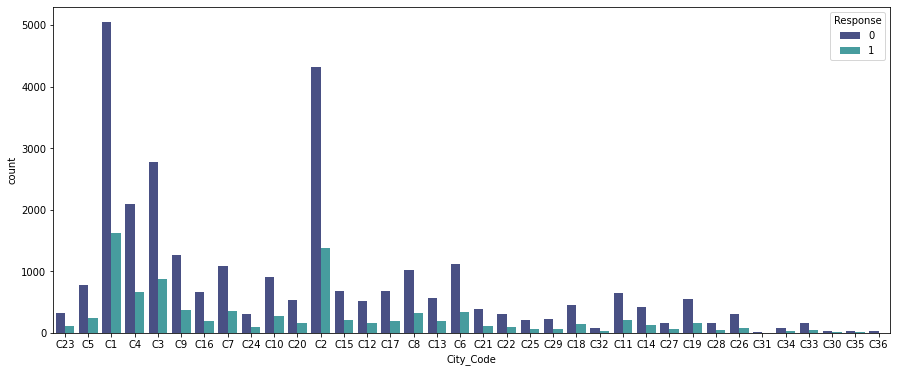

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=df,x='City_Code',hue='Response',palette='mako');
fig.savefig('citycode.jpg',dpi=200,bbox_inches='tight')

In [ ]:
CITY = df.groupby(['City_Code','Response'])['Response'].count().unstack()
CITY['PositiveRatio'] = CITY[1] / (CITY[1] + CITY[0])
CITY = CITY.sort_values(by='PositiveRatio', ascending=False)[:11]
CITY

Response,0,1,PositiveRatio
City_Code,,,
C30,27,12,0.307692
C32,87,35,0.286885
C34,75,30,0.285714
C27,156,59,0.274419
C23,315,118,0.272517
C33,158,53,0.251185
C11,641,215,0.251168
C13,562,186,0.248663
C7,1084,358,0.248266


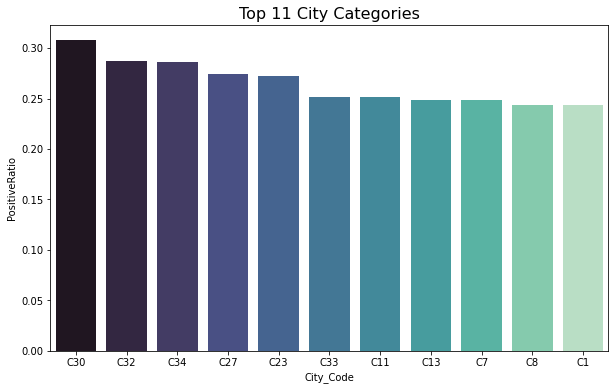

In [ ]:
CITY = CITY.reset_index()
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Top 11 City Categories', fontdict={'fontsize': 16})
sns.barplot(data=CITY,x='City_Code',y='PositiveRatio',palette='mako');
fig.savefig('top11citycode.jpg',dpi=200,bbox_inches='tight')

In this particular case I would recommend focusing on the top 11 scoring positive ratios. Ranks 10 and 11 are exponentially larger in volume than the first 9 and have the potential to yield high ROI with positive to total ratios close to 25%.

**Submission**

In [ ]:
features = testdf.columns
target = ['Response']

In [ ]:
# preparing submission
gbclf.fit(traindf[features], traindf[target].values.ravel())
predictions = gbclf.predict_proba(testdf[features])[:,1]
submission = pd.DataFrame({'ID': testdf2['ID'],'Response': predictions})

In [ ]:
submission['Response'].describe()

count    12882.000000
mean         0.227742
std          0.107901
min          0.007234
25%          0.172267
50%          0.219342
75%          0.276750
max          0.829486
Name: Response, dtype: float64

In [ ]:
submission['Response'] = submission['Response'].apply(lambda x: 0 if x < 0.3 else 1)

In following the theme of the test and train datasets as well as presenting a client list of a respectable size, the cut off for positive response predictions will be 30%

In [ ]:
submission.to_csv('submission.csv', index=False)

**Recommendations**

The model's top 3 features were Reco Policy Category, Reco Policy Premium and City Code. Within those three categories, subcategories yielded the highest positive to total response ratios. It is recommended to focus on clients in/with:

City Codes: C1, C2, C13, C23

Reco Policy Categories: 15, 22

Reco Policy Premiums between: 15,000 & 19,999.

**Limitations**

The project was limited by the anonymity of the data. Specifically the geographic data that could have been used for additional feature engineering leading to higher scores.

**Future Work**

Future models can be created using more complicated feature engineering and analysis such as clustering of the geographic features. For the purposes of this project, doing so would have complicated the output and made it difficult to implement within a real workplace.